In [1]:
from neuron import h,gui
from matplotlib.pyplot import *
from numpy import *

-------

|-|       soma(0-1)
 `|       d0000(0-1)
 `|       d0001(0-1)
 `|       d0002(0-1)
 `|       d0003(0-1)
 `|       d0004(0-1)
 `|       d0005(0-1)
 `|       d0006(0-1)
 `|       d0007(0-1)
 `|       d0008(0-1)
 `|       d0009(0-1)



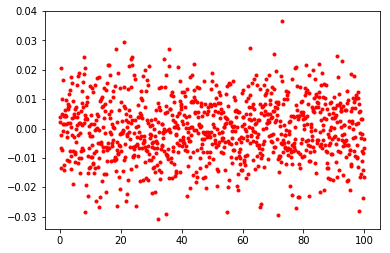

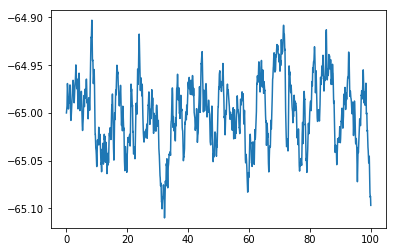

In [16]:
class nrn_sim(object):
    NBranches=0
    soma=None
    branches_nrn=[]
    def __init__(self):
        pass

    
            
            
    def assign_cell(self,neuron=None):
        self.clear()
        h('create soma')
        soma=[s for s in h.allsec() if s.name()[0]=='s'][0]
        soma.L=soma.diam=10.#replace
        
        NBranches=10#replace later

        for iBranch in range(NBranches):
            h('create d{:04d}'.format(iBranch))
        self.NBranches=NBranches
        self.soma=soma
        self.fill_branches_from_nrn()
        
        self.biophysics()
        
    def connect_branches(self):
        for d in self.branches_nrn:
            d.connect(self.soma(0))
      
    def fill_branches_from_nrn(self):
        self.branches_nrn=[0 for i in range(self.NBranches)]
        for d in [s for s in h.allsec() if s.name()[0]=='d']:
            self.branches_nrn[int(d.name()[1:5])]=d
            d.L=200.
            d.diam=1.
        self.connect_branches()
  
    def biophysics(self):
        for sec in h.allsec():
            sec.Ra=100
            sec.cm=1
        for soma in [s for s in h.allsec() if s.name()[0]=='s']:
            soma.insert('hh')
            for seg in soma:
                seg.hh.gnabar=0.12
                seg.hh.gkbar=0.036
                seg.hh.gl=0.0003
                seg.hh.el=-54.3

        for cd in self.branches_nrn: #for all dendrites
            cd.insert('pas')
            for seg in cd:
                seg.pas.g=0.001
                seg.pas.e=-65
    def run(self,tstop=100.):
        v_s=h.Vector()
        v_d1=h.Vector()
        v_d2=h.Vector()

        t=h.Vector()#(linspace(0.))
        #i_d3=h.Vector()
        #t=h.Vector()
        t.record(h._ref_t)
        v_s.record(h.soma(0.5)._ref_v)
        v_d1.record(self.branches_nrn[1](0.5)._ref_v)
        v_d2.record(self.branches_nrn[2](0.5)._ref_v)
        #v_d3.record(dend3(0.8)._ref_v)
        h.tstop=tstop
        h.run()
        plot(t,v_s)
        #plot(t,v_d1)
        #plot(t,v_d2)
        
    def clear(self):
        for d in h.allsec():
            h.delete_section(d)
    def topology(self):

        print '-------'
        h.topology()
        
    def current_to_nrnstim(self,tstim,istim,comp,frac):    
        Nq=len(istim)                  
        dt=tstim[1]-tstim[0]

        stim=[None for i in range(Nq)]
        #comp=h.soma#branches_nrn[0]
        for jstim in range(Nq):
            stim[jstim]=h.IClamp(comp(frac))
            stim[jstim].dur=dt
            stim[jstim].amp=istim[jstim]
            stim[jstim].delay=tstim[jstim]
        figure()
        plot(tstim,[s.amp for s in stim],'.r')
        return stim


N=nrn_sim()
N.assign_cell()

N.topology()


tstim=linspace(0,100,1001)
#istim=1.-0.01*(tstim-10)**2
istim=0.01*random.randn(1001)
#figure()
#plot(tstim,istim,'.')
comp=N.branches_nrn[0]#[1]
frac=0.8
#stim=attach_current_clamp(N)
stim=N.current_to_nrnstim(tstim,istim,comp,frac)
   
figure()

N.run()   

In [16]:
h.topology()


|-|       soma(0-1)
 `|       d0000(0-1)
 `|       d0001(0-1)
 `|       d0002(0-1)
 `|       d0003(0-1)
 `|       d0004(0-1)
 `|       d0005(0-1)
 `|       d0006(0-1)
 `|       d0007(0-1)
 `|       d0008(0-1)
 `|       d0009(0-1)



1.0

In [2]:
soma = h.Section(name='soma')
dend1 = h.Section(name='d1')
dend2=h.Section(name='d2')
dend3=h.Section(name='d3')

#h.psection()#sec=dend)

In [2]:
h('create soma,d1,d2,d3')

1

In [3]:
dend1.connect(soma(1))
dend2.connect(dend1(0.5))
dend3.connect(dend1(0.95))

d3

In [233]:
soma.L=soma.diam=10
dend1.L=400
dend2.L=100
dend3.L=100
for cd in [dend1,dend2,dend3]:
    cd.diam=1.5


In [279]:

h.pt3dclear(sec=soma)
h.pt3dadd(0,-5,0,12,sec=soma)
h.pt3dadd(0,0,0,1,sec=soma)

#h.pt3dclear(sec=dend1)
#h.pt3dclear(sec=dend2)
#h.pt3dclear(sec=dend3)
for sec in [dend1,dend2]:#,dend3]:
    h.pt3dclear(sec=sec)

h.topology()
psh=h.PlotShape()
psh.exec_menu('Show Diam')


|-|       soma(0-1)
   `|       d1(0-1)
    `|       d3(0-1)
    `|       d2(0-1)
|-|       d3(0-1)



0.0

In [5]:
for sec in h.allsec():
    print h.issection(sec.name())
    #h.disconnect()
    h.delete_section(sec=sec)#sec.delete()
    

1.0
1.0
1.0
1.0


In [6]:
h.topology()

1.0

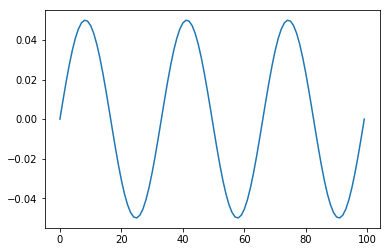

In [263]:

plot([s.amp for s in stim])
from numpy import *

In [260]:
v_s=h.Vector()
v_d1=h.Vector()
v_d3=h.Vector()

t=h.Vector()#(linspace(0.))
i_d3=h.Vector()
t=h.Vector()
t.record(h._ref_t)
v_s.record(soma(0.5)._ref_v)
v_d1.record(dend1(0.001)._ref_v)
v_d3.record(dend3(0.8)._ref_v)
h.tstop=100.0




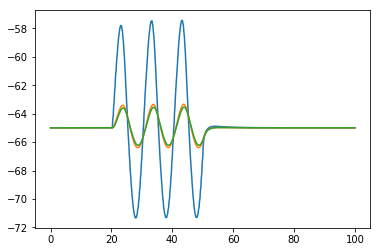

In [264]:
"""stim.delay=20
stim.dur=50
stim.amp=0.010

stim2.delay=30
stim2.dur=0*1
stim2.amp=0.050
"""
h.finitialize(-61)
h.run()
    #plot(t,v_d2)
plot(t,v_s)
plot(t,v_d1)
plot(t,v_d3)
#xlim([19,30])